## Решающие деревья (DecisionTrees) [sklearn](https://scikit-learn.org/stable/modules/tree.html)

Решающее дерево - это бинарное дерево, где
 * во внетренних вершинах $v$ заданы предикаты $\beta_0: X\rightarrow \text{{0, 1}}$
 * в каждой листовой вершине $v$ заданы прогнозы $C_v \in Y (\text{или вероятности } C_v \in R_+^k, \sum_{k=1}^kC_{vk} = 1)$

#### Процесс применения дерева:

```python
def predict(v, Y):
    if v является листом:
        return Cv
    if Beta_v(X) = 0:
        return predict(left(v), X) # левая часть поддерева
    else:
        return predict(right(v), X) # правая часть поддерева
```

Предикаты, которые в основном используются, выглядят следующим образом  $ \beta_v(X) = [X_j < t]$

<h4 align='center'>Дерево решений разбивает пространство на прямоугольники</h4>

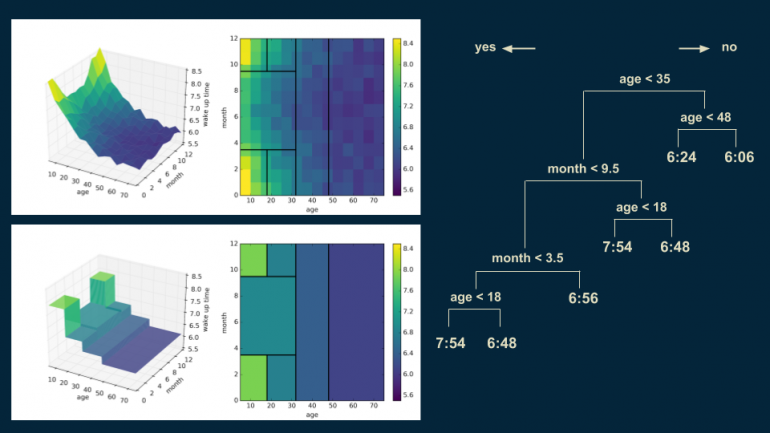

#### Построение дерево
```python
def fit_node(m, Rm):
    if  выполнен критерий останова:
        находим Cm и объявляем вершину листовой
        break
    #поиск лучшего предиката
    j_, t_ = argmax Q(Rm, j, t)
    
    #разбиваем объкты по найденному предикату
    Rl = {(x, y) [Xj <= t]}
    Rr = {(x, y) [Xj > t]}
    
    #далее рекурсивно вызываем функцию
    fit_node(l, Rl)
    fit_node(r, Rr)
```


***Критерии останова***
 * если достигнута максимальная глубина
 * если количество объектов меньше минимального значения $|R_m| < k$
 * если ошибка константного прогноза на $R_m$ меньше порога
 
***Как находить Cm***
 * оптимальный константный прогноз на $R_m$
 * вероятности классов по долям в $R_m$
 
***Как выбирать лучший предикат*** $Q(R_m, j, t)$

Выбор проводится по критерию информативности (inpurity) $H(R)$ - функция $H(R)$ возвращает тем большое значение чем больше разнообразие ответов и имеет следующий вид:

$$H(R) = \underset{c \in Y}{min} \frac{1}{|R|} \sum_{(x,y)\in R} L(y, c)$$
где L(y, c) - функция потерь (рассмотрим позже)
$$Q(R_m, j, t) = H(R_m) - \frac{|R_l|}{|R_m|}H(R_l) - \frac{|R_r|}{|R_m|}H(R_r) \rightarrow max$$
Минимизируя значения информативности после разбиения мы максимизируем разницу и решаем уравнение. 

Решение этого уравнения  можно добиться только **полным перебором по j и t**.

Рассмотрим возможные функции потерь.

***Функции потерь для регрессии***

Квадратичная $L(y, c) = (y - c)^2$, тогда формула информативности примет вид
$$H(R) = \underset{c \in Y}{min} \frac{1}{|R|} \sum_{(x,y)\in R} (y - c)^2 = \frac{1}{|R|} \sum_{(x,y)\in R} (y - \hat{y})^2 = дисперсия$$

***Функции потерь для классификации***
1) Критерий Джини Gini
$$H(R) = 1 - \sum_{k=1}^k (p_k)^2$$
2) Энтропийный критерий
$$H(R) = -\sum_{k=1}^k p_k*\log_2(p_k)$$

### Некоторые дополнения для реализации
***Обработка пропусков***
1) Способ 1
 * проблема выбора лучшего предиката
     * перебираем все j и t для $[x_j >= t]$
     * для части объектов не знаем $x_j$ как посчиать $Q(R_m, j, t)$?
         * считаем $Q(R_m, j, t)$ только на объектах для которых $x_j$ существует
         * отправляем объекты с пропусками в оба поддерева
 * проблема применения к новому x с пропуском
     * прогноз $a(x)$ считаем как усреднение ответов обоих поддеревьев $a(x) = \frac{|R_l|}{|R_m|}*a_l + \frac{|R_r|}{|R_m|}*a_r$
     
     
2) Способ 2: суррогатные предикаты (находим предикаты с другим признаком $[x_k >= t_*]$ с максимально схожим разбиением)

***Категориальные признаки***
1) Перебираем все возможные варианты разбиения на 2 непересекающихся множества (высокая сложность алгоритма $O(\frac{2^b-2}{2}$ ))
2) Упорядочиваем категории по доле положительных отметок в каждой категории, затем заменяем категории числами от 1 до n, и разбиваем используя как числовой признак. P.S. доказано что данное разбиение по качеству аналогично 1-му варианту, но сложность алгоритма значительно ниже.

***Имена алгоритмов***
 * ID3: алгоритм классификации с энтропийным критерием
 * С4.5: алгоритм классификации с модификацией энтропийного критерия и стрижкой
 * CART: алгоритм классификации (критерий Джини) и регрессии (критерий MSE) с использованием суррогатных предикатов и стрижкой
 
Многие функции реализованы в sklearn и а разные алгоритмы отчасти потеряли свою актуальность, поскольку сейчас в основном используют композиции деревьев.

## Реализация решающих деревьев на python

In [17]:
from IPython.display import Image
Image(url= "https://disk.yandex.ru/i/KXqfJZJ53dZSxQ", width=400, height=400)

In [2]:
#импорт необходимых библиотек
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

### Вспомогательный класс для хранения информации в узлах дерева (графа)

In [3]:
class Node():
    #инициализация класса
    def __init__(self, name, deep):
        self.deep_ = deep
        self.leaf_ = False
        self.name_ = name
    
    #записать значение предсказания в узел
    def set_predict(self, C):
        self.leaf_ = True
        self.C = C
        
    #получить предсказание
    def get_predict(self):
        return self.C
    
    #записать предикат
    def set_predicat(self, j, t):
        self.j = j
        self.t = t
        
    #получить предикат
    def get_predicat(self):
        return self.j, self.t

### Класс предок с общими функциями для классификации и регрегрессии

In [52]:
#модель построения дерева
class DecisionTreeMy():  
    #инициализация класса
    def __init__(self):
        self.graph = {}
    
    #обучение модели
    def fit(self, X, y, max_deep=3, min_object=2):
        self.X = X
        self.y = y
        self.min_object = min_object
        self.max_deep = max_deep
        self.fit_node(X, y, Node("", 0))
        
    #рекурсивная функция обучения
    def fit_node(self, X, y, node):
        self.graph[node.name_] = node
        
        #проверка условия останова
        if node.deep_ >= self.max_deep or X.shape[0] <= self.min_object: #нет условия - ошибка константного прогноза
            #запись прогноза (среднего значения оставшихся ответов) в узел
            node.set_predict(self.count_C(y))
        else:      
            j, t = self.find_best_predicate(X, y) # поиск предиката        
            Xl, yl, Xr, yr = self.split(X, y, j, t) #делим датасет по найденному лучшему предикату
            
            #создаем узлы для левого и правого поддерева и вызываем функцию рекурсивно
            node_left = Node(node.name_ + "l", node.deep_ + 1)
            node_left.set_predicat(j, t)
            node_right = Node(node.name_ + "r", node.deep_ + 1)
            node_right.set_predicat(j, t)
        
            self.fit_node(Xl, yl, node_left) #левое поддерево
            self.fit_node(Xr, yr, node_right) #правое поддерево
    
    #поиск лучшего предиката перебором по j и t
    def find_best_predicate(self, X, y):
        best_j = None
        best_t = None
        best_q = -10000000
        
        for j in range(X.shape[1]):
            for i in range(X.shape[0]):
                t = (X.T[j][i]) #+ X.T[j][i + 1])/2 #перебор существующих вариантов показывает лучший результат чем среднее
                
                Xl, yl, Xr, yr = self.split(X, y, j, t)
                if Xl.shape[0] != 0 and Xr.shape[0] != 0:
                    q = (self.count_inpurity(y) - Xl.shape[0]*self.count_inpurity(yl) / X.shape[0] 
                                                - Xr.shape[0]*self.count_inpurity(yr) / X.shape[0])
                    if q > best_q:
                        best_q = q
                        best_j = j
                        best_t = t
        return best_j, best_t
        
    #деление датасета по предкату
    def split(self, X, y, j, t):
        return X[X.T[j] <= t], y[X.T[j] <= t], X[X.T[j] > t], y[X.T[j] > t] # left and right
    
    #выдача прогноза массиву входных векторов X
    def predict(self, X):
        return np.apply_along_axis(self.predict_one, 1, X)
        
    #прогноз по каждому отдельному вектору x
    def predict_one(self, x):
        path = ''
        for i in range(self.max_deep + 1):
            node = self.graph[path+'l']
            j, t = node.get_predicat()
            if x[j] <= t:
                path += 'l'
            else:
                path += 'r'
            
            node_next = self.graph[path]
            if node_next.leaf_:
                return node_next.get_predict()

    #визуализация дерева
    def visualization(self):
        for node in self.graph.values():
            if node.name_ == '':
                pass
            else:
                s = ''
                j, t = node.get_predicat()
                for i in range(node.deep_ - 1):
                    s += '|   '
                s += '|--- feature_'+str(j)
                if node.name_[-1] == 'l':
                    s += ' <= '
                elif node.name_[-1] == 'r':
                    s += ' > '
                else:
                    s = 'BAD'
                s += str(round(t, 2))
                print(s)
                l = ''
                if node.leaf_:
                    for i in range(node.deep_):
                        l += '|   '
                    l += '|--- value '+'['+str(round(node.get_predict(), 2))+']'
                    print(l)
                    
    #расчет прогноза
    def count_C(self, y):
        raise NotImplementedError
        
    #расчет информативности
    def count_inpurity(self, y):
        raise NotImplementedError

## Регрессия

### Класс потомок для регрессии

In [53]:
class DecisionTreeRegressorMy(DecisionTreeMy):    
    #расчет прогноза средним значением из узла дерева
    def count_C(self, y):
        return np.mean(y) 
        
    #расчет информативности (как дисперсия для mse)
    def count_inpurity(self, y):
        return np.var(y)

### Анализ модели регрессии

In [54]:
#импорт одого из стандартных датасетов
data = datasets.load_boston()
X = data.data
y = data.target

#сплит данных на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

#построение и прогноз разработанной модели
model_my = DecisionTreeRegressorMy()
model_my.fit(X_train, y_train)
print(f'my mse {mean_squared_error(y_test, model_my.predict(X_test))}')

#построение и прогноз модели sklearn
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)
print(f'sklearn mse {mean_squared_error(y_test, model.predict(X_test))}')

my mse 26.424188138142796
sklearn mse 28.46121537542918


### Визуализация полученных деревьев

In [46]:
output1 = widgets.Output()
with output1:
    print('sklearn model \n')
    display(print(tree.export_text(model)))
    
output2 = widgets.Output()
with output2:
    print('my model \n')
    display(model_my.visualization())

two_columns = widgets.HBox([output1, output2])
display(two_columns)

## Классификация

### класс потомок для классификации

In [47]:
class DecisionTreeClassifierMy(DecisionTreeMy):
    
    #модификация метода fit для приема параметра criterion как критерий Джини или энтропийный
    def fit(self, X, y, max_deep=3, min_object=2, criterion='gini'):
        #инициализация дополнительного параметра criterion
        self.criterion = criterion
        #вызов функции родителя
        super().fit(X, y, max_deep, min_object)
        
    #расчет прогноза (значение максимально представленного класса)
    def count_C(self, y):
        ar, ind = np.unique(y, return_counts=True)
        return ar[ind.argmax()]
        
    #расчет информативности (для многоклассовой классификации расчет будет чуть сложнее см. формулы вверху)
    def count_inpurity(self, y):
        if self.criterion == 'gini':
            p_one = y[y==1].shape[0] / y.shape[0]
            p_zero = y[y==0].shape[0] / y.shape[0]            
            return 1 - (p_one**2+p_zero**2)      
        elif self.criterion == 'entropy':
            p_one = y[y==1].shape[0] / y.shape[0]
            if p_one == 0:
                p_one = 10 **-10
            p_zero = y[y==0].shape[0] / y.shape[0]
            if p_zero == 0:
                p_zero = 10 **-10
            return -(p_one*np.log2(p_one) + p_zero*np.log2(p_zero))
        else:
            raise NameError('переменная criterion не может быть ' + self.criterion)

### Анализ модели классификации¶

In [48]:
#импорт одого из стандартных датасетов
data = datasets.load_breast_cancer()
X = data.data
y = data.target

#сплит данных на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)

#построение модели sklearn
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
print(f'accuracy_score  model sklearn {accuracy_score(y_test, model.predict(X_test))}')

#построение созданной модели
model_my = DecisionTreeClassifierMy()
model_my.fit(X_train, y_train, criterion='gini')
print(f'accuracy_score my model {accuracy_score(y_test, model_my.predict(X_test))}')

accuracy_score  model sklearn 0.9300699300699301
accuracy_score my model 0.9300699300699301


In [49]:
output1 = widgets.Output()
with output1:
    print('sklearn model \n')
    display(print(tree.export_text(model)))
    
output2 = widgets.Output()
with output2:
    print('my model \n')
    display(model_my.visualization())

two_columns = widgets.HBox([output1, output2])
display(two_columns)

Дерево реализованной модели больше за счет выдачи одного класса при разделении (sklearn этот момент учел и оптимизировал)

### Не реализованы описанные дополнения но это не изменит ключево понимание принципа работы